# Mask NO-Mask Identification using open cv 

For this project, we have to take some photos of people with mask and store them in a seperate folder name as **'Mask'** and similarly without mask people in  **'no_mask'** folder

In this project, I take 1000 photos of people with mask and 1000 photos of people without mask (total 2000 photos)

In [1]:
# Importing some neccasry libraries
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import keras

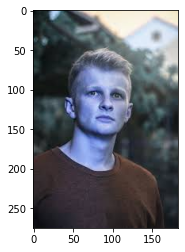

In [17]:
path = 'Mask_NoMask'
categories = ['mask' , 'no_mask']

input_image = []

for i in categories:
    folder = os.path.join(path , i)
    for image in os.listdir(folder):
        image_path = os.path.join(folder , image)
        image_array = cv2.imread(image_path)    # using cv2 i am reading reading image & store it in variable image_array
        plt.imshow(image_array)
        break

The above process is of reading and plotting an image , so in this way we can read each n every image and store it in a variable and then do resizing to make all images of same size as given in below code

In [18]:
image_size = 200

path = 'Mask_NoMask'
categories = ['mask' , 'no_mask']

input_image = []

for i in categories:
    folder = os.path.join(path , i)
    label = categories.index(i)
    for image in os.listdir(folder):
        image_path = os.path.join(folder , image)
        image_array = cv2.imread(image_path)
        image_array = cv2.resize( image_array , (image_size , image_size))
        input_image.append( [image_array , label]) # reading , storing and resizing images and then store it in list

In [19]:
np.random.shuffle(input_image)   # shuffling images both with and without masks

In [20]:
input_image[0]   # showing values and label of 1st random image

[array([[[ 59,  57,  56],
         [ 58,  56,  55],
         [ 58,  56,  55],
         ...,
         [  7,   6,   8],
         [  9,   8,  10],
         [ 10,   9,  11]],
 
        [[ 58,  56,  55],
         [ 57,  55,  54],
         [ 56,  54,  53],
         ...,
         [  8,   7,   9],
         [  9,   8,  10],
         [ 10,   9,  11]],
 
        [[ 58,  56,  55],
         [ 56,  54,  54],
         [ 54,  52,  52],
         ...,
         [ 10,   9,  11],
         [ 10,   9,  11],
         [ 10,   9,  11]],
 
        ...,
 
        [[195, 192, 189],
         [183, 181, 179],
         [165, 163, 163],
         ...,
         [208, 202, 203],
         [210, 204, 205],
         [212, 206, 207]],
 
        [[199, 196, 192],
         [192, 190, 187],
         [180, 179, 178],
         ...,
         [208, 202, 203],
         [210, 204, 205],
         [212, 205, 206]],
 
        [[203, 200, 196],
         [200, 199, 194],
         [193, 192, 189],
         ...,
         [208, 202, 203],
  

So this **'input_image'** contains image data with thier numeric values and their label( 0 or 1) at end

0 means with mask                                                           
1 means without masks

In [21]:
x = []  #empty list
y = []  #empty list

for values , label in input_image:
    x.append(values)
    y.append(label)

this 'x' contains numeric avlues of all images in 'x' list                     
'y' list contains label of each images in it (0 --> without mask & 1 --> with mask)

In [22]:
len(x)   # there are 2000 total images of mask and no-mask, 

2000

In [23]:
# converting list into array
x = np.array(x)  
y = np.array(y)

Now , we have to split the data into train and test                   
so we took **1600** images for training purpose and remaining for test

In [24]:
x_train = x[:1600]
x_test  = x[1600:]

y_train = y[:1600]
y_test  = y[1600:]

In [25]:
# Normalizing process, divide each image by biggest pixel as 255 (256 pixel but python strt with 0)
x_train = x_train / 255
x_test  = x_test / 255

### Now we will build a Nueral Network with multiple convolution and hidden layers

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D , Dropout , Flatten , Dense

In [27]:
model = Sequential()

model.add(Conv2D(filters = 15 , kernel_size = (6,6) , activation = 'relu'))   # 1st convolution layer
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 15 , kernel_size = (6,6) , activation = 'relu'))   # 2nd convolution layer
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128 , activation = 'relu' , input_shape = x.shape[1:]))       # 1st hidden layer
model.add(Dense(64 , activation = 'relu' ))                                   # 2nd hidden layer
model.add(Dense(64 , activation = 'relu'))                                    # 3rd hidden layer

model.add(Dense(2 , activation = 'softmax'))                                  # Output layer

In [28]:
model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy' , metrics=['accuracy'])

In [31]:
model.fit(x_train , y_train , epochs = 10)
# there is huge no of images here so this model may takes some time to train

Epoch 1/10
50/50 [==============================] - 74s 1s/step - loss: 0.1570 - accuracy: 0.9394
Epoch 2/10
50/50 [==============================] - 72s 1s/step - loss: 0.1138 - accuracy: 0.9563
Epoch 3/10
50/50 [==============================] - 71s 1s/step - loss: 0.0829 - accuracy: 0.9688
Epoch 4/10
50/50 [==============================] - 71s 1s/step - loss: 0.0720 - accuracy: 0.9712
Epoch 5/10
50/50 [==============================] - 87s 2s/step - loss: 0.0627 - accuracy: 0.9769
Epoch 6/10
50/50 [==============================] - 132s 3s/step - loss: 0.0653 - accuracy: 0.9750
Epoch 7/10
50/50 [==============================] - 101s 2s/step - loss: 0.0895 - accuracy: 0.9694
Epoch 8/10
50/50 [==============================] - 90s 2s/step - loss: 0.0368 - accuracy: 0.9869
Epoch 9/10
50/50 [==============================] - 79s 2s/step - loss: 0.0400 - accuracy: 0.9869
Epoch 10/10
50/50 [==============================] - 71s 1s/step - loss: 0.0205 - accuracy: 0.9944


In [38]:
model.save('Mask_Identification.h5')  # Saving model

Model has been builded , now its time of prediction

### Prediction

In [33]:
pred = model.predict(x_test)
pred

array([[2.51724594e-03, 9.97482836e-01],
       [2.36521842e-07, 9.99999762e-01],
       [9.99959946e-01, 4.00127537e-05],
       [9.89839435e-01, 1.01605225e-02],
       [2.36543566e-01, 7.63456404e-01],
       [9.99992371e-01, 7.65114055e-06],
       [9.01750568e-03, 9.90982473e-01],
       [4.03418730e-04, 9.99596655e-01],
       [2.06331396e-03, 9.97936726e-01],
       [1.07642235e-02, 9.89235818e-01],
       [1.61272255e-05, 9.99983907e-01],
       [6.66722888e-04, 9.99333203e-01],
       [1.04399840e-03, 9.98955965e-01],
       [9.96192575e-01, 3.80739407e-03],
       [1.03716496e-02, 9.89628315e-01],
       [1.00000000e+00, 1.65503944e-10],
       [2.79366178e-03, 9.97206271e-01],
       [2.03970931e-02, 9.79602873e-01],
       [1.49434144e-02, 9.85056579e-01],
       [2.05540936e-03, 9.97944534e-01],
       [1.64592743e-03, 9.98354077e-01],
       [9.91484267e-04, 9.99008596e-01],
       [9.99999642e-01, 3.70506172e-07],
       [9.99992847e-01, 7.13252803e-06],
       [9.992468

In [34]:
pred = np.argmax(pred,1)
pred

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

### Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
matrix = confusion_matrix(pred , y_test)
matrix

array([[155,  27],
       [ 28, 190]], dtype=int64)

In [37]:
accuracy = matrix.diagonal().sum() * 100 / matrix.sum()
accuracy

86.25

So, we got 86% accuracy on this model

### Now its time to build an window which access the camera and tells whether person in front of camera wear a mask or not

In [43]:
# from keras.models import load_model
# model=load_model("Mask_Idenfication.h5")

results={0:'Mask  found',1:'Mask not found '}
GR_dict={0:(0,255,0),1:(255,255,0)}

rect_size = 4
cap = cv2.VideoCapture(0) 


haarcascade = cv2.CascadeClassifier('Harcascade/haarcascade_frontalface_alt.xml')

while True:
    (rval, im) = cap.read()
    im=cv2.flip(im,1,1)  # flip image as mirror or inverted
    rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
    faces = haarcascade.detectMultiScale(rerect_size)
    for f in faces:
        (x, y, w, h) = [v * rect_size for v in f] 
        
        face_img = im[y:y+h, x:x+w]
        rerect_sized=cv2.resize(face_img,(200,200))
        normalized=rerect_sized/255.0
        reshaped=np.reshape(normalized,(1,200,200,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)

        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),GR_dict[label],-1)
        cv2.putText(im, results[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,0,0),2)  # font of mask found or not found

    cv2.imshow('Live Camera',   im)
    key = cv2.waitKey(10)
    
    if key == 27: # use the escape key to close the window
        break

cap.release()

cv2.destroyAllWindows()


## --- End of Notebook ---